In [1]:
# image compression using k-means clustering
# inspired by Andrew Ng's Machine Learning Course assignment on k-means clustering

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from joblib import dump

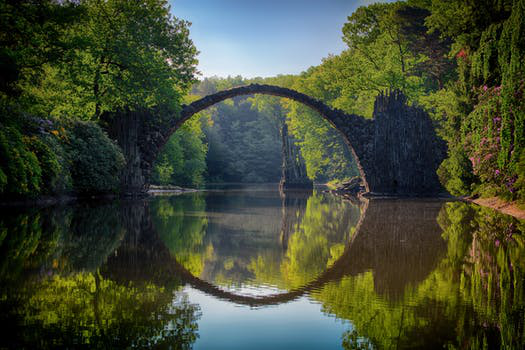

In [3]:
# import image
im = Image.open("bridge.jpeg")
# turn image into RGB
rgb_im = im.convert("RGB")
# display image
rgb_im

In [4]:
# get each pixel's RGB value
width = rgb_im.size[0]
height = rgb_im.size[1]

# list to store our data
pixel_data = []

# iterate through each pixel getting its RGB values
i = 0
while i < width:
    j = 0
    while j < height:
        pixel_data.append(rgb_im.getpixel((i, j))) # get rgb value of pixel and append to list
        j += 1 # go to the next row
    i += 1 # go to the next column
    
# turn pixel_data into a dataframe (for displaying) and an array (for the clustering algorithm)
pixel_np = np.array(pixel_data)
pixel_df = pd.DataFrame(pixel_data, columns=["r", "g", "b"])

In [5]:
# display pixel data
pixel_df.head(5)

,r,g,b
0,0,11,0
1,4,19,0
2,14,29,8
3,16,31,8
4,9,23,0


In [6]:
# run k-means clustering on the pixel data
num_of_centroids = 256 # an 8-bit image is represented by 2^8 colours
num_of_runs = 10 # number of times to run the k-means algorithm before determining the best centroids
max_iterations = 300 # number of iterations before k-means comes to an end for a single run
verbosity = 0 # show what's going on when the algorithm is running

# initiate a kmeans object
compressor = KMeans(n_clusters=num_of_centroids, n_init=num_of_runs, max_iter=max_iterations, verbose=verbosity)
# run k-means clustering
compressor.fit(pixel_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=256, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
# save the fitted model
dump(compressor, "compressor.joblib")

['compressor.joblib']

In [104]:
# create an array replacing each pixel label with its corresponding cluster centroid
pixel_centroid = np.array([list(compressor.cluster_centers_[label]) for label in compressor.labels_])

In [134]:
# reshape this array according to the height and width of our image
pixel_centroids_reshaped = np.reshape(pixel_centroid, (350, 525, 3))

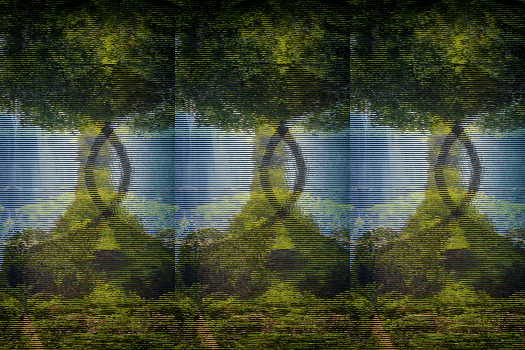

In [140]:
# display the compressed image
Image.fromarray(pixel_centroids_reshaped.astype("uint8"))

# What in the world is this!?